In [14]:
import matplotlib.pyplot as plt

In [2]:
#plt.imread("/kaggle/input/original-nd-generated/gen_covid/content/generated_covid/generated_covid0816.png").shape

In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, Input
from keras.layers.noise import GaussianNoise
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
                  input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
vgg16_model = Model(inputs=baseModel.input, outputs=headModel)

58892288/58889256 [==============================] - 0s 0us/step


In [2]:
res_model1 = ResNet50(weights='imagenet',include_top=False)
headModel_res = res_model1.output
headModel_res = GlobalAveragePooling2D(name = "global_avg_2d")(headModel_res)
headModel_res = Dense(2, activation="softmax")(headModel_res)

res_model = Model(inputs=res_model1.input, outputs=headModel_res)

94773248/94765736 [==============================] - 1s 0us/step


In [3]:
res_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [7]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
for layer in vgg16_model.layers:
    layer.trainable = False

In [4]:
for layer in res_model.layers[:-2]:
    layer.trainable = False

In [10]:
def cnn_model(input_shape = (256,256,1),classes=2):
  
    X_input = Input(input_shape)

    X = Conv2D(32,kernel_size=(3,3),strides=(1,1),padding = "same")(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    
    X = Conv2D(32,kernel_size=(3,3),strides=(1,1),padding = "same")(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(64,kernel_size=(3,3),strides=(1,1),padding = "same")(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)


    X = Conv2D(64,kernel_size=(3,3),strides=(1,1),padding = "same")(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(64,kernel_size=(3,3),strides=(1,1),padding = "same")(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(128,kernel_size=(3,3),strides=(1,1),padding = "same")(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(512,kernel_size=(3,3),strides=(1,1),padding = "same")(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = Dropout(rate=0.25)(X)
    X=  Dense(128, activation='relu')(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)
    model = Model(inputs=X_input,outputs=X,name='cnn_model')

    return model



In [11]:
optimizer_vgg = keras.optimizers.SGD(lr=0.005)
vgg16_model.compile(loss='categorical_crossentropy', optimizer=optimizer_vgg, metrics=['accuracy'])

In [12]:
model = cnn_model()
optimizer_ourCnn = keras.optimizers.SGD(lr=0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_ourCnn, metrics=['accuracy'])

In [5]:
optimizer_res = keras.optimizers.SGD(lr=0.005)
res_model.compile(loss='categorical_crossentropy', optimizer=optimizer_res, metrics=['accuracy'])

In [14]:
model.summary()

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      12

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
"""#train_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19CGAN/COVID-19+CGAN/train+CGAN"
train_dir = "../input/our-gen-last"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),color_mode="rgb",class_mode='categorical',batch_size=32)

validation_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19/COVID-19/val"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=32)


test_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19/COVID-19/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = vali_datagen.flow_from_directory(test_dir,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=32)"""

'#train_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19CGAN/COVID-19+CGAN/train+CGAN"\ntrain_dir = "../input/our-gen-last"\ntrain_datagen = ImageDataGenerator(rescale=1./255)\ntrain_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),color_mode="rgb",class_mode=\'categorical\',batch_size=32)\n\nvalidation_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19/COVID-19/val"\nvali_datagen = ImageDataGenerator(rescale=1./255)\nvali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(224,224),color_mode=\'rgb\',class_mode=\'categorical\',batch_size=32)\n\n\ntest_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19/COVID-19/test"\ntest_datagen = ImageDataGenerator(rescale=1./255)\ntest_generator = vali_datagen.flow_from_directory(test_dir,target_size=(224,224),color_mode=\'rgb\',class_mode=\'categorical\',batch_size=32)'

In [7]:
#train_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19CGAN/COVID-19+CGAN/train+CGAN"
train_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19/COVID-19/train"
train_datagen = ImageDataGenerator(rotation_range = 45, horizontal_flip=True,vertical_flip = True)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),color_mode="rgb",class_mode='categorical',batch_size=32,interpolation = "bilinear")

validation_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19/COVID-19/val"
vali_datagen = ImageDataGenerator(rotation_range = 45, horizontal_flip=True,vertical_flip = True)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=32,interpolation = "bilinear")


test_dir = "../input/covid19-chest-ct-image-augmentation-gan-dataset/COVID-19/COVID-19/test"
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=32,interpolation = "bilinear",shuffle=False)

Found 425 images belonging to 2 classes.
Found 118 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [8]:
from keras.callbacks import ModelCheckpoint
checkpoint_res = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5',verbose=2, monitor='val_loss',save_best_only=True, mode='auto')


In [19]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:

epochs = 50

resnet_raw = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

Epoch 1/50
14/14 [==============================] - 19s 950ms/step - loss: 1.3697 - accuracy: 0.5009 - val_loss: 2.1907 - val_accuracy: 0.4915

Epoch 00001: val_loss improved from inf to 2.19074, saving model to model-001-0.512941-0.491525.h5
Epoch 2/50
14/14 [==============================] - 8s 617ms/step - loss: 0.7567 - accuracy: 0.6396 - val_loss: 0.6503 - val_accuracy: 0.6949

Epoch 00002: val_loss improved from 2.19074 to 0.65033, saving model to model-002-0.663529-0.694915.h5
Epoch 3/50
14/14 [==============================] - 9s 624ms/step - loss: 0.7988 - accuracy: 0.6374 - val_loss: 0.8591 - val_accuracy: 0.5424

Epoch 00003: val_loss did not improve from 0.65033
Epoch 4/50
14/14 [==============================] - 8s 565ms/step - loss: 0.6910 - accuracy: 0.6612 - val_loss: 0.8238 - val_accuracy: 0.5932

Epoch 00004: val_loss did not improve from 0.65033
Epoch 5/50
14/14 [==============================] - 8s 590ms/step - loss: 0.6643 - accuracy: 0.7031 - val_loss: 0.6413 - va

In [16]:

epochs = 50

resnet_raw1 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

Epoch 1/50
14/14 [==============================] - 9s 621ms/step - loss: 0.3317 - accuracy: 0.8612 - val_loss: 0.7218 - val_accuracy: 0.6864

Epoch 00001: val_loss did not improve from 0.49733
Epoch 2/50
14/14 [==============================] - 8s 567ms/step - loss: 0.3235 - accuracy: 0.8565 - val_loss: 0.5674 - val_accuracy: 0.7119

Epoch 00002: val_loss did not improve from 0.49733
Epoch 3/50
14/14 [==============================] - 8s 579ms/step - loss: 0.3215 - accuracy: 0.8588 - val_loss: 0.5550 - val_accuracy: 0.7373

Epoch 00003: val_loss did not improve from 0.49733
Epoch 4/50
14/14 [==============================] - 9s 623ms/step - loss: 0.3622 - accuracy: 0.8424 - val_loss: 0.6268 - val_accuracy: 0.7119

Epoch 00004: val_loss did not improve from 0.49733
Epoch 5/50
14/14 [==============================] - 8s 580ms/step - loss: 0.3578 - accuracy: 0.8235 - val_loss: 0.5398 - val_accuracy: 0.7373

Epoch 00005: val_loss did not improve from 0.49733
Epoch 6/50
14/14 [============

In [19]:

epochs = 50

resnet_raw2 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

Epoch 1/50
14/14 [==============================] - 9s 614ms/step - loss: 0.3746 - accuracy: 0.8282 - val_loss: 0.5394 - val_accuracy: 0.7797

Epoch 00001: val_loss did not improve from 0.49733
Epoch 2/50
14/14 [==============================] - 8s 554ms/step - loss: 0.3085 - accuracy: 0.8635 - val_loss: 0.7202 - val_accuracy: 0.6949

Epoch 00002: val_loss did not improve from 0.49733
Epoch 3/50
14/14 [==============================] - 8s 548ms/step - loss: 0.2710 - accuracy: 0.8824 - val_loss: 0.7334 - val_accuracy: 0.7119

Epoch 00003: val_loss did not improve from 0.49733
Epoch 4/50
14/14 [==============================] - 8s 599ms/step - loss: 0.2629 - accuracy: 0.8894 - val_loss: 0.6224 - val_accuracy: 0.7119

Epoch 00004: val_loss did not improve from 0.49733
Epoch 5/50
14/14 [==============================] - 8s 582ms/step - loss: 0.2823 - accuracy: 0.8659 - val_loss: 0.5607 - val_accuracy: 0.7288

Epoch 00005: val_loss did not improve from 0.49733
Epoch 6/50
14/14 [============

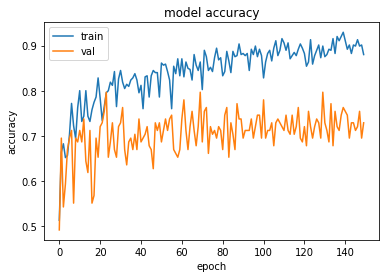

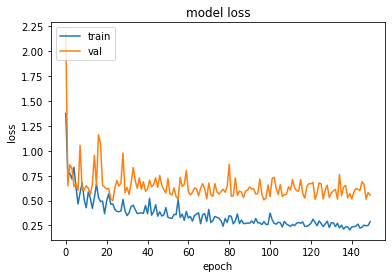

In [20]:
plt.plot(resnet_raw.history['accuracy']+resnet_raw1.history['accuracy']+resnet_raw2.history['accuracy'])
plt.plot(resnet_raw.history['val_accuracy'] + resnet_raw1.history['val_accuracy']+resnet_raw2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(resnet_raw.history['loss'] + resnet_raw1.history['loss']+resnet_raw2.history['loss'])
plt.plot(resnet_raw.history['val_loss'] + resnet_raw1.history['val_loss']+resnet_raw2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model_saved = keras.models.load_model('model-024-0.795294-0.796610.h5')


In [21]:
model_saved.evaluate(test_generator)

7/7 [==============================] - 1s 138ms/step - loss: 0.5637 - accuracy: 0.7688


[0.5636906027793884, 0.7688442468643188]

In [29]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

predictions = model_saved.predict(
    test_generator,
    steps = np.math.ceil(test_generator.samples / test_generator.batch_size)
    )
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes)
accuracy = metrics.accuracy_score(true_classes, predicted_classes)  

In [30]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        94
           1       0.84      0.70      0.76       105

    accuracy                           0.77       199
   macro avg       0.78      0.77      0.77       199
weighted avg       0.78      0.77      0.77       199



In [22]:
res_model.evaluate(test_generator)

7/7 [==============================] - 1s 169ms/step - loss: 0.7145 - accuracy: 0.7136


[0.7144948840141296, 0.713567852973938]

In [ ]:
epochs = 10

resnet_raw1 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

resnet_raw2 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

resnet_raw3 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

resnet_raw4 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
plt.plot(resnet_raw.history['accuracy'] + resnet_raw1.history['accuracy'] + resnet_raw2.history['accuracy'] + resnet_raw3.history['accuracy'] + resnet_raw4.history['accuracy'])
plt.plot(resnet_raw.history['val_accuracy'] + resnet_raw1.history['val_accuracy'] + resnet_raw2.history['val_accuracy'] + resnet_raw3.history['val_accuracy'] + resnet_raw4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(resnet_raw.history['loss'] + resnet_raw1.history['loss'] + resnet_raw2.history['loss'] + resnet_raw3.history['loss'] + resnet_raw4.history['loss'])
plt.plot(resnet_raw.history['val_loss'] + resnet_raw1.history['val_loss'] + resnet_raw2.history['val_loss'] + resnet_raw3.history['val_loss'] + resnet_raw4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_saved = keras.models.load_model('model-004-0.927059-0.703390.h5')


In [ ]:
model_saved.evaluate(test_generator)

In [ ]:
res_model.evaluate(test_generator)

In [ ]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

predictions = model_saved.predict(
    test_generator,
    steps = np.math.ceil(test_generator.samples / test_generator.batch_size)
    )
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes)
accuracy = metrics.accuracy_score(true_classes, predicted_classes)  

In [ ]:
print(report)

In [ ]:
resnet_aug_hist1 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
resnet_aug_hist2 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
resnet_aug_hist3 = res_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint_res]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)



In [ ]:
plt.plot(resnet_aug_hist.history['accuracy'] + resnet_aug_hist1.history['accuracy'] + resnet_aug_hist2.history['accuracy'] + resnet_aug_hist3.history['accuracy'])
plt.plot(resnet_aug_hist.history['val_accuracy']+ resnet_aug_hist1.history['val_accuracy'] + resnet_aug_hist2.history['val_accuracy'] + resnet_aug_hist3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(resnet_aug_hist.history['loss'] + resnet_aug_hist1.history['loss'] + resnet_aug_hist2.history['loss'] + resnet_aug_hist3.history['loss'] )
plt.plot(resnet_aug_hist.history['val_loss'] + resnet_aug_hist1.history['val_loss'] + resnet_aug_hist2.history['val_loss'] + resnet_aug_hist3.history['val_loss'] )
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_saved = keras.models.load_model('model-005-0.967568-0.677966.h5')


In [ ]:
model_saved.evaluate(test_generator)

In [ ]:
res_model.evaluate(test_generator)

In [ ]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

predictions = res_model.predict(
    test_generator,
    steps = np.math.ceil(test_generator.samples / test_generator.batch_size)
    )
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes)
accuracy = metrics.accuracy_score(true_classes, predicted_classes) 

In [ ]:
print(report)

In [ ]:
vgg16_model.evaluate(test_generator)

In [ ]:
epochs = 10

vgg16_aug_hist = vgg16_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)


In [ ]:
epochs = 10

vgg16_aug_hist1 = vgg16_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)


In [ ]:
epochs = 10

vgg16_aug_hist2 = vgg16_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)


In [ ]:
epochs = 10

vgg16_aug_hist3 = vgg16_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
plt.plot(vgg16_aug_hist.history['accuracy'] + vgg16_aug_hist1.history['accuracy'] + vgg16_aug_hist2.history['accuracy'] + vgg16_aug_hist3.history['accuracy'])
plt.plot(vgg16_aug_hist.history['val_accuracy']+ vgg16_aug_hist1.history['val_accuracy'] + vgg16_aug_hist2.history['val_accuracy'] + vgg16_aug_hist3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(vgg16_aug_hist.history['loss'] + vgg16_aug_hist1.history['loss'] + vgg16_aug_hist2.history['loss'] + vgg16_aug_hist3.history['loss'] )
plt.plot(vgg16_aug_hist.history['val_loss'] + vgg16_aug_hist1.history['val_loss'] + vgg16_aug_hist2.history['val_loss'] + vgg16_aug_hist3.history['val_loss'] )
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_saved = keras.models.load_model('./model-010-0.913514-0.737288.h5')

In [ ]:
model_saved.evaluate(test_generator)

In [ ]:
vgg16_model.evaluate(test_generator)

In [ ]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

predictions = model_saved.predict(
    test_generator,
    steps = np.math.ceil(test_generator.samples / test_generator.batch_size)
    )
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes)
accuracy = metrics.accuracy_score(true_classes, predicted_classes)  

In [ ]:
print(report)

In [ ]:
epochs = 10

history_16_our = vgg16_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)



In [ ]:
epochs = 10

history_16_our_1 = vgg16_model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=vali_generator,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)


In [ ]:
vgg16_model.summary()

In [ ]:
vgg16_model.evaluate(test_temp)

In [ ]:
vgg16_model.evaluate(test_generator)

In [ ]:
import numpy as np
import sklearn.metrics as metrics

In [ ]:
from sklearn.metrics import classification_report

predictions = vgg16_model.predict(
    test_generator,
    steps = np.math.ceil(test_generator.samples / test_generator.batch_size)
    )
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes)
accuracy = metrics.accuracy_score(true_classes, predicted_classes)  


In [ ]:
print(report)

In [ ]:
#model_saved = keras.models.load_model('./model-001-0.839774-0.674641.h5')


In [ ]:
vgg16_model.evaluate(test_temp)

In [ ]:
plt.plot(history_16_our.history['accuracy']+history_16_our_1.history['accuracy'])
plt.plot(history_16_our.history['val_accuracy']+history_16_our_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:

plt.plot(history_16_our.history['loss']+history_16_our_1.history['loss'])
plt.plot(history_16_our.history['val_loss']+history_16_our_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
epochs = 10

history_16_aug = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)



In [ ]:
epochs = 10

history_16_aug_1 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)


In [ ]:
epochs = 10

history_16_aug_2 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

history_16_aug_3 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

history_16_aug_4 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

history_16_aug_5 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

history_16_aug_6 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

history_16_aug_7 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

history_16_aug_8 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

history_16_aug_9 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 10

history_16_aug_10 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
epochs = 40

history_16_aug_11 = vgg16_model_aug.fit(
    train_generator11, 
    epochs=epochs,
    validation_data=vali_generator11,
    callbacks=[checkpoint]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
vgg16_model_aug.evaluate(test_generator11)

In [ ]:
vgg16_model_aug.summary()

In [ ]:
model_notNormalize=cnn_model()
optimizer_n = keras.optimizers.SGD(lr=0.001)
model_notNormalize.compile(loss='categorical_crossentropy', optimizer=optimizer_n, metrics=['accuracy'])

In [ ]:
checkpoint1 = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5',
                             verbose=2, monitor='val_loss',save_best_only=True, mode='auto')

history_n = model_notNormalize.fit(
    train_temp, 
    epochs=epochs,
    validation_data=val_temp,
    callbacks=[checkpoint1]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
history_n = model_notNormalize.fit(
    train_temp, 
    epochs=epochs,
    validation_data=val_temp,
    callbacks=[checkpoint1]
    #validation_steps=total_validate/batch_size,
    #steps_per_epoch=total_train/batch_size,
)

In [ ]:
model_notNormalize.evaluate(test_generator)

In [ ]:
model_notNormalize.evaluate(test_temp)

In [ ]:
model_notNormalize1=cnn_model()
optimizer_n1 = keras.optimizers.SGD(lr=0.001)
model_notNormalize1.compile(loss='categorical_crossentropy', optimizer=optimizer_n1, metrics=['accuracy'])

In [ ]:
train_temp = keras.preprocessing.image_dataset_from_directory"../input/last-covid/generated/COVID",label_mode = "categorical",color_mode = "grayscale",batch_size = 32,image_size = (256,256) )
